<a href="https://colab.research.google.com/github/kish-git/Sparks-Foundation/blob/master/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation - Data Science and Business Analytics intern.**

# **Task 2: Prediction using Unsupervised ML.**

#**Problem Statement: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.**

##**Name: Kishor Raut**

In [77]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

In [78]:
# Loading the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
print("____________________________________________________________________________")
iris_df.head() # See the first 5 rows

____________________________________________________________________________


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [79]:
print("______________________________________________________________________________")
iris_df.tail()

______________________________________________________________________________


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [80]:
print("________________________________________________________________________________")
iris_df.describe()

________________________________________________________________________________


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [81]:
d = pd.DataFrame(iris_df)
print(d.dtypes)
print("Shape of object : ", d.shape)

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object
Shape of object :  (150, 4)


In [82]:
print("__________________________________________________________________________________________")
d.isnull().sum()
corr = d.corr()
corr

__________________________________________________________________________________________


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


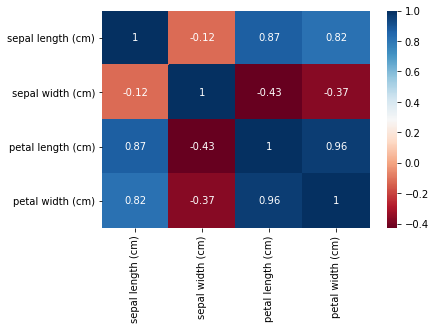

In [84]:
#data visualisation

sns.heatmap(corr, annot = True, cmap="RdBu" )

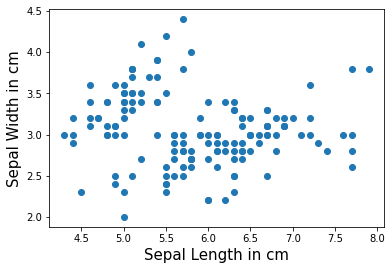

________________________________________________________________________________



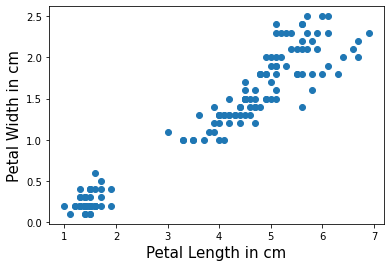

________________________________________________________________________________


In [85]:
plt.scatter(d['sepal length (cm)'], d['sepal width (cm)'])
plt.xlabel('Sepal Length in cm', fontsize = 15)
plt.ylabel('Sepal Width in cm', fontsize = 15)
plt.show()
print("________________________________________________________________________________")
print("")
plt.scatter(d['petal length (cm)'], d['petal width (cm)'])
plt.xlabel('Petal Length in cm', fontsize = 15)
plt.ylabel('Petal Width in cm', fontsize = 15)
plt.show()
print("________________________________________________________________________________")


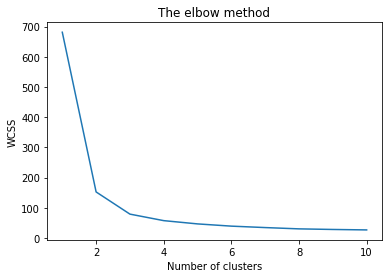


You can clearly see why it is called 'The elbow method' from the above graph,
the optimum clusters is where the elbow occurs.

From this it is quite evident that the number of clusters = 3.


In [86]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()
print()
print("You can clearly see why it is called 'The elbow method' from the above graph,")
print("the optimum clusters is where the elbow occurs.")
print()
print("From this it is quite evident that the number of clusters = 3.")

In [87]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

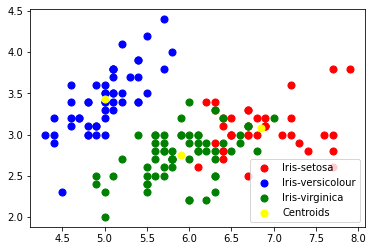

In [88]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'yellow', label = 'Centroids')

plt.legend()

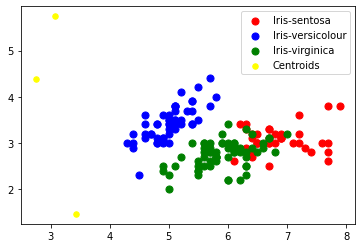

In [89]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 50, c = 'red', label = 'Iris-sentosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:,2], 
            s = 30, c = 'yellow', label = 'Centroids')

plt.legend()

         Optimum number of clusters : 3



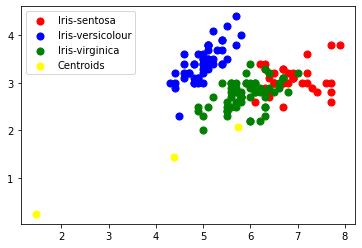

In [90]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 50, c = 'red', label = 'Iris-sentosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], 
            s = 50, c = 'yellow', label = 'Centroids')

plt.legend()

print("         Optimum number of clusters : 3")
print()